In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Historical Product Demand.csv')

In [3]:
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [4]:
data.shape

(1048575, 5)

In [5]:
data.Date = pd.to_datetime(data.Date)

In [6]:
data.Date.min(), data.Date.max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

In [9]:
data.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013-09-27 00:00:00,1000
freq,16936,764447,481099,2075,112682
first,NaN,NaN,NaN,2011-01-08 00:00:00,NaN
last,NaN,NaN,NaN,2017-01-09 00:00:00,NaN


In [10]:
data.Order_Demand = data.Order_Demand.str.replace('(', '')
data.Order_Demand = data.Order_Demand.str.replace(')', '')

In [11]:
data.Order_Demand = data.Order_Demand.astype(float)

In [12]:
data.describe()

,Order_Demand
count,1.048575e+06
mean,4.906977e+03
std,2.892678e+04
min,0.000000e+00
25%,2.000000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


In [13]:
data[['Product_Code', 'Warehouse', 'Product_Category']].describe()

,Product_Code,Warehouse,Product_Category
count,1048575,1048575,1048575
unique,2160,4,33
top,Product_1359,Whse_J,Category_019
freq,16936,764447,481099


In [17]:
data.isna().sum()/data.shape[0]

Product_Code        0.000000
Warehouse           0.000000
Product_Category    0.000000
Date                0.010718
Order_Demand        0.000000
dtype: float64

In [18]:
data = data[data['Date'].notnull()]
data.isna().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [66]:
data.groupby('Product_Category')['Order_Demand'].agg('sum').reset_index().sort_values(by = 'Order_Demand', ascending = False)

,Product_Category,Order_Demand
18,Category_019,4.240159e+09
5,Category_006,4.055713e+08
4,Category_005,1.996745e+08
6,Category_007,1.286915e+08
27,Category_028,4.905535e+07
32,Category_033,4.261000e+07
29,Category_030,4.096656e+07
20,Category_021,4.480570e+06
31,Category_032,4.473048e+06
8,Category_009,3.782141e+06


<AxesSubplot:xlabel='Product_Category'>

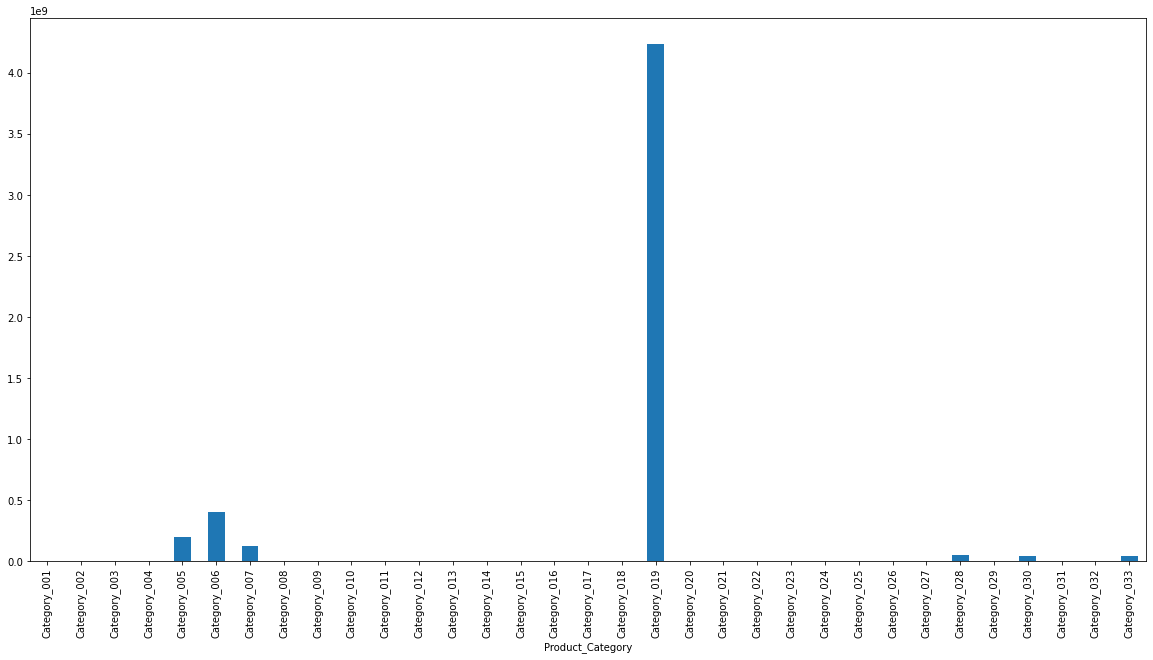

In [21]:
plt.figure(figsize = (20, 10))
data.groupby('Product_Category')['Order_Demand'].agg('sum').plot(kind = 'bar')

005, 006, 007 and 019 are major product categories

<AxesSubplot:xlabel='Warehouse'>

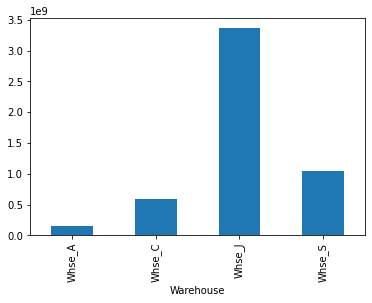

In [22]:
data.groupby('Warehouse')['Order_Demand'].agg('sum').plot(kind = 'bar')

Seasonality in the data

In [23]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [24]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

<AxesSubplot:xlabel='Year,Month'>

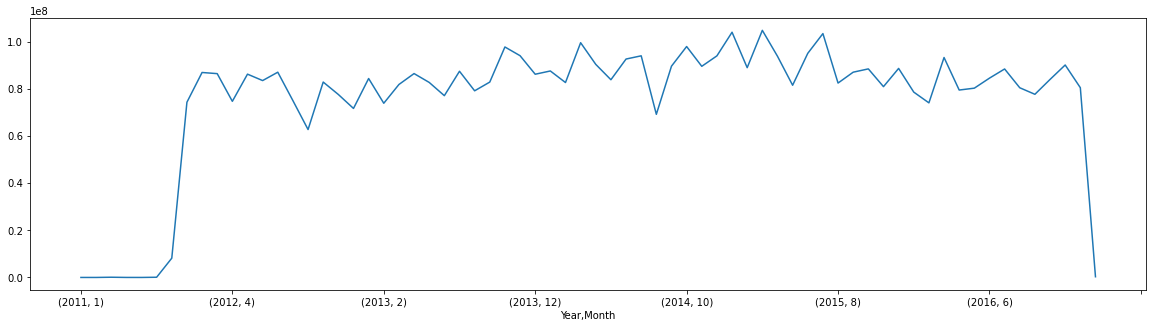

In [33]:
plt.figure(figsize = (20, 5))
#plt.ylim([0, 500000000])
data.groupby(['Year','Month'])['Order_Demand'].agg('sum').plot(kind = 'line')

<AxesSubplot:xlabel='Year'>

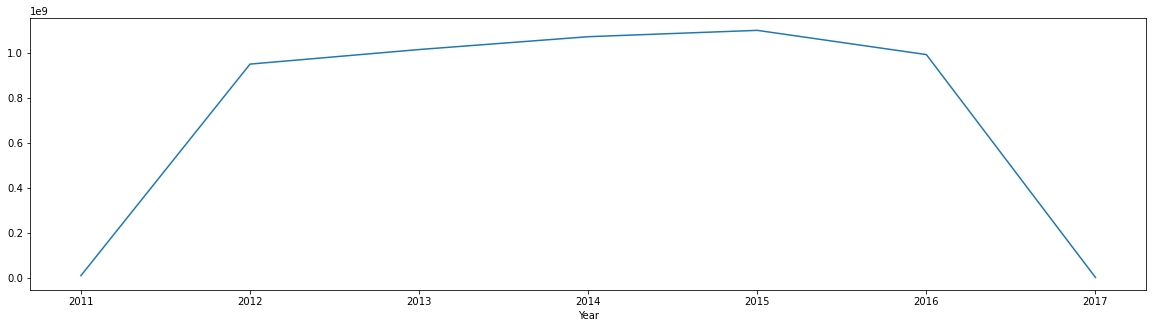

In [35]:
plt.figure(figsize = (20, 5))
#plt.ylim([0, 500000000])
data.groupby('Year')['Order_Demand'].agg('sum').plot(kind = 'line')

<AxesSubplot:xlabel='Year', ylabel='Order_Demand'>

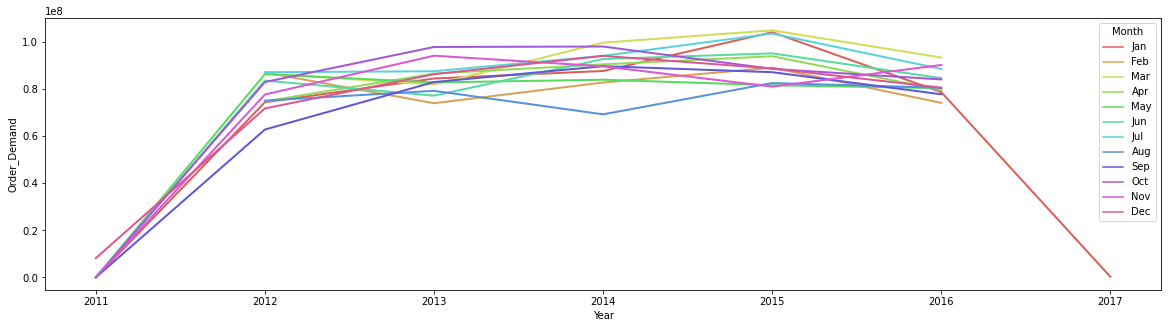

In [63]:
plt.figure(figsize = (20, 5))
temp = data.groupby(['Year', 'Month'])['Order_Demand'].agg('sum').reset_index().sort_values(by = ['Year', 'Month'], ascending = False)
temp.Month = temp.Month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
sns.set_palette(sns.color_palette('hls', 12))
sns.lineplot(data=temp, x="Year", y="Order_Demand", hue="Month", markers = True, lw = 2, hue_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


<AxesSubplot:xlabel='Month', ylabel='Order_Demand'>

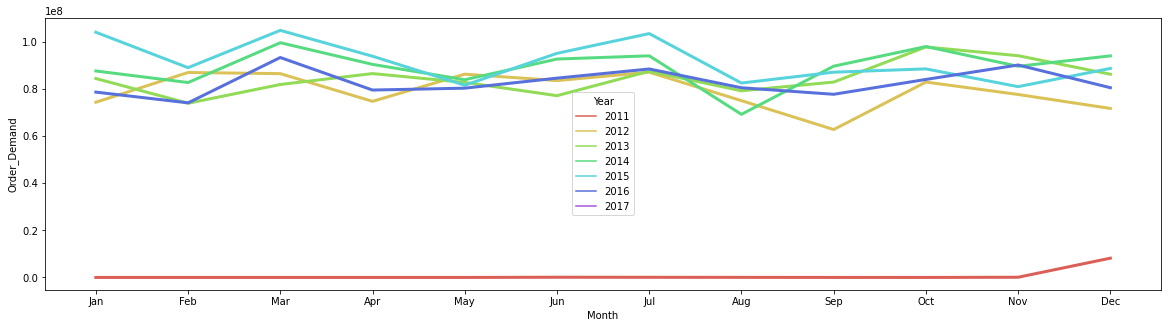

In [61]:
temp = data.groupby(['Year', 'Month'])['Order_Demand'].agg('sum').reset_index().sort_values(by = ['Month'], ascending = True)
temp.Month = temp.Month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
sns.set_palette(sns.color_palette('hls', 8))
temp.Year = temp.Year.astype("category")
plt.figure(figsize = (20, 5))
sns.lineplot(data=temp, x="Month", y="Order_Demand", hue="Year", markers = True, lw = 3)

In [67]:
data = data[data['Year'] != 2017]

In [68]:
data = data[data['Year'] != 2011]

In [69]:
data['Year'].value_counts()

2013    218298
2014    216404
2015    209661
2012    203635
2016    188645
Name: Year, dtype: int64

<AxesSubplot:xlabel='Month'>

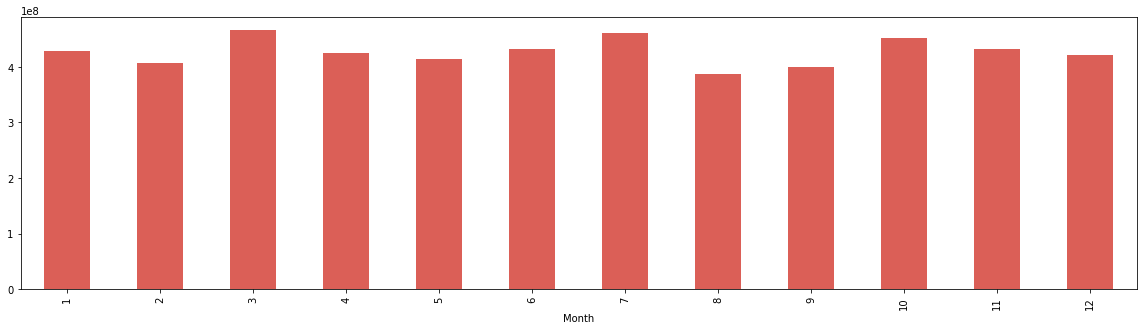

In [71]:
plt.figure(figsize = (20, 5))
data.groupby('Month')['Order_Demand'].agg('sum').plot(kind = 'bar')